In [4]:
import requests
# url = 'http://nrvis.com/download/data/ia/ia-infect-dublin.zip'
# content = requests.get(url)

file_name = 'ia-infect-dublin.mtx'

In [5]:
import networkx as nx

graph = nx.Graph()

In [6]:
with open(file_name, 'r') as file:
    for iter, line in enumerate(file):
        if iter > 1:
            line = line.split()
            graph.add_edge(line[1], line[0])

In [7]:
degree = dict(graph.degree())
sorted_degree = [(r, degree[r]) for r in sorted(degree, key=degree.get, reverse = True)]

Statystyki sieci

In [10]:
print('Number of nodes:', len(graph.nodes()))
print('Number of edges:', len(graph.edges()))
print('Graph density:', round(nx.density(graph),5))
print('Graph diameter:', nx.diameter(graph))
print('Max degree: ',sorted_degree[0][1])           
print('Min degree:', sorted_degree[-1][1])

Number of nodes: 410
Number of edges: 2765
Graph density: 0.03298
Graph diameter: 9
Max degree:  50
Min degree: 1


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

Rozkład stopnia wierzchołków

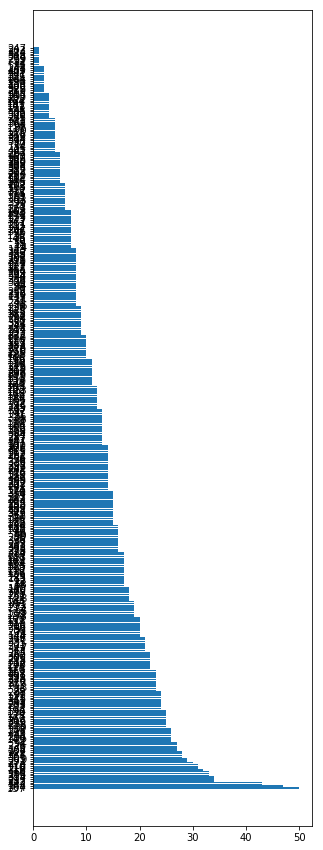

In [12]:
plt.figure(figsize=(5,15))
plt.barh([id[0] for id in sorted_degree], [id[1] for id in sorted_degree])
plt.show()

Histogram stopnia wierzchołków

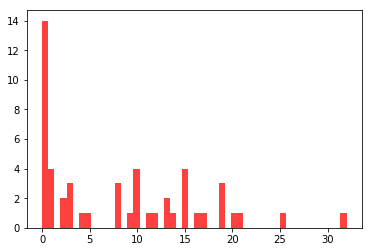

In [14]:
plt.hist(nx.degree_histogram(graph), bins=50, alpha=0.75, color='red')
plt.show()


Rozkład centralności wierzchołków

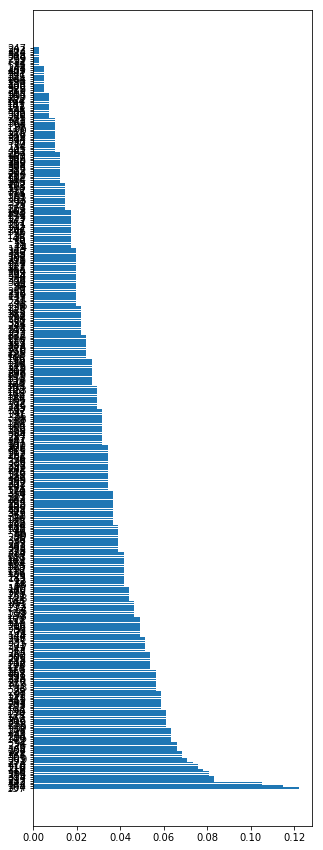

In [15]:
centrality = nx.degree_centrality(graph)
sorted_centrality = [(v, centrality[v]) for v in sorted(centrality, key=centrality.get, reverse = True)]
# print(sorted_centrality)

plt.figure(figsize=(5,15))
plt.barh([id[0] for id in sorted_centrality], [id[1] for id in sorted_centrality])
plt.show()

Rozkład bliskoći wierzchołków

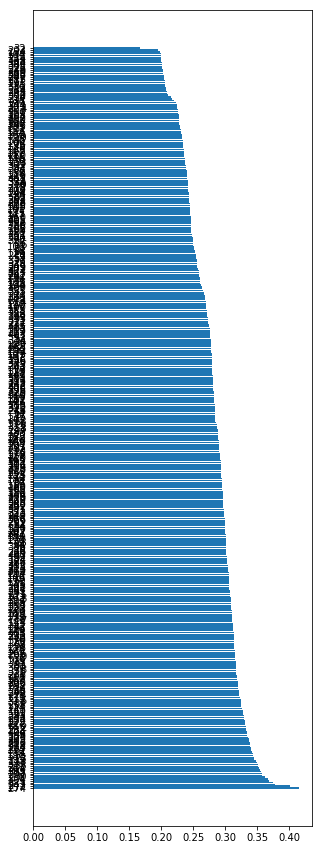

In [22]:
cls_centrality = nx.closeness_centrality(graph)
# print(cls_centrality)
sorted_cls_centrality = [(v, cls_centrality[v]) for v in sorted(cls_centrality, key=cls_centrality.get, reverse = True)]
# print(sorted_centrality)

plt.figure(figsize=(5,15))
plt.barh([id[0] for id in sorted_cls_centrality], [id[1] for id in sorted_cls_centrality])
plt.show()

Rozkład pośrednictwa wierzchołków

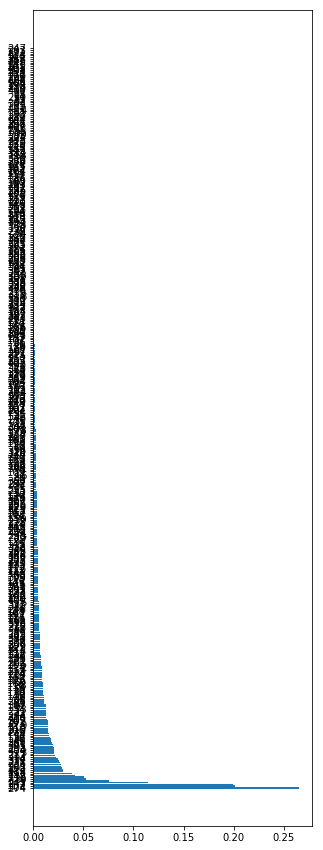

In [34]:
betweenness = nx.betweenness_centrality(graph)
sorted_betweenness = [(v, betweenness[v]) for v in sorted(betweenness, key=betweenness.get, reverse = True)]

plt.figure(figsize=(5,15))
plt.barh([id[0] for id in sorted_betweenness], [id[1] for id in sorted_betweenness])
plt.show()

Rozkład klastrowania wierzchołków

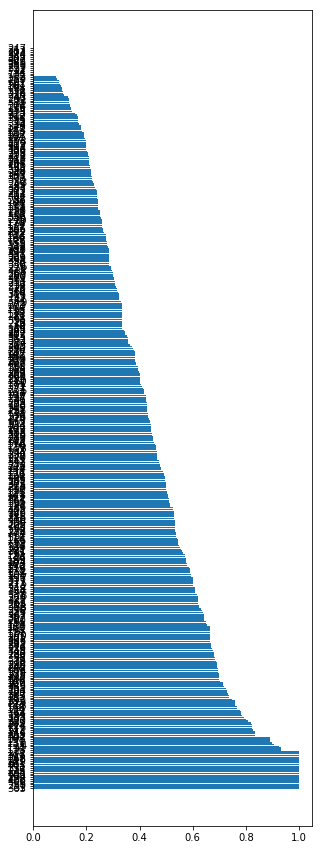

In [31]:
clustering = nx.clustering(graph)
sorted_clustering = [(v, clustering[v]) for v in sorted(clustering, key=clustering.get, reverse = True)]
# print(sorted_centrality)

plt.figure(figsize=(5,15))
plt.barh([id[0] for id in sorted_clustering], [id[1] for id in sorted_clustering])
plt.show()

Pytania 
1. Na wstępnych etapach epidemii, zidentyfikować osobę którą należy zaszczepić, w celu ograniczenia przenoszenia wirusa.
2. W prypadku podejrzenia powtórzenia epidemi, ustalić osoby które należy odizolować, które mają najwięcej kontaktów z innymi osobami.  
3. Identyfikacja osób które mogą przekazać informacje o leczeniu, prewencji itp. innym chorym.

NetworkXError: Node ('274', 0.26528048246853664) has no position.

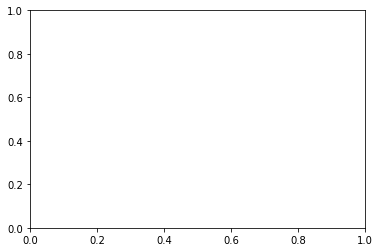

In [46]:
# 1
sorted_betweenness[:20]
nx.drawing.nx_pylab.draw_networkx_nodes(graph,pos=nx.spring_layout(graph),nodelist=[id[0] for id in sorted_betweenness[:20]], node_size=10, edges=True)

In [43]:
# 2
sorted_degree[:20]
nx.drawing.nx_pylab.draw_networkx_nodes(graph,pos=nx.spring_layout(graph),nodelist=[id[0] for id in sorted_degree[:20]], node_size=10, edges=True)

[('157', 50),
 ('304', 47),
 ('148', 43),
 ('372', 43),
 ('282', 34),
 ('217', 34),
 ('314', 34),
 ('333', 33),
 ('286', 33),
 ('60', 33),
 ('318', 32),
 ('210', 31),
 ('116', 31),
 ('410', 31),
 ('274', 30),
 ('291', 29),
 ('9', 29),
 ('305', 28),
 ('366', 28),
 ('193', 28)]

In [45]:
# 3
sorted_cls_centrality[:20]
nx.drawing.nx_pylab.draw_networkx_nodes(graph,pos=nx.spring_layout(graph),nodelist=[id[0] for id in sorted_cls_centrality[:20]], node_size=10, edges=True)

[('274', 0.41565040650406504),
 ('157', 0.4013738959764475),
 ('243', 0.3787037037037037),
 ('333', 0.3748854262144821),
 ('1', 0.36913357400722024),
 ('304', 0.36780575539568344),
 ('150', 0.36194690265486723),
 ('30', 0.35814360770577935),
 ('297', 0.35814360770577935),
 ('305', 0.35658238884045335),
 ('193', 0.354419410745234),
 ('314', 0.3531951640759931),
 ('282', 0.35107296137339056),
 ('38', 0.35107296137339056),
 ('337', 0.350471293916024),
 ('148', 0.34897610921501704),
 ('217', 0.34573119188503804),
 ('73', 0.3448566610455312),
 ('181', 0.3442760942760943),
 ('132', 0.34312080536912754)]